In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pew = pd.read_csv('pew.csv')
pew_tidy = pew.melt(
    id_vars = ["religion"], # Identifier variables (all others are "unpivoted")
    var_name = "income", # Variable
    value_name = "frequency" # Value
)
pew


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


In [4]:
pew_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [5]:
#Rad tb 
tb = pd.read_csv("tb.csv")
tb

,iso2,year,m04,m514,m014,m1524,m2534,m3544,m4554,m5564,...,f04,f514,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,292.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [6]:
#Check if there is any NA in iso2
tb.iso2.isna().any()


True

In [7]:
#Replace any occurence of NA in iso2 with "NA"
tb.loc[tb.iso2.isna(), "iso2"] = "NA"

In [8]:
tb.iso2.isna().any()

False

In [9]:
tb.dtypes

iso2      object
year       int64
m04      float64
m514     float64
m014     float64
m1524    float64
m2534    float64
m3544    float64
m4554    float64
m5564    float64
m65      float64
mu       float64
f04      float64
f514     float64
f014     float64
f1524    float64
f2534    float64
f3544    float64
f4554    float64
f5564    float64
f65      float64
fu       float64
dtype: object

In [10]:
tb.describe().T


,count,mean,std,min,25%,50%,75%,max
year,5769.0,1994.229329,8.423265,1980.0,1987.0,1994.0,2002.00,2008.0
m04,392.0,8.806122,46.094789,0.0,0.0,0.0,2.00,655.0
m514,401.0,28.975062,127.881505,0.0,0.0,1.0,8.00,1519.0
m014,2381.0,79.438051,280.489536,0.0,0.0,6.0,36.00,4648.0
m1524,2407.0,922.364769,4278.638975,0.0,10.0,92.0,511.50,77121.0
m2534,2408.0,1301.894518,5253.398971,0.0,15.0,151.5,728.00,83850.0
m3544,2415.0,1205.566046,5409.064589,0.0,16.0,134.0,591.50,90498.0
m4554,2421.0,983.515489,4780.782748,0.0,13.0,98.0,434.00,78815.0
m5564,2414.0,696.171914,3771.934518,0.0,9.0,62.0,273.75,57492.0
m65,2408.0,609.440615,3660.224592,0.0,8.0,53.0,227.25,70376.0


In [11]:
tb.columns

Index(['iso2', 'year', 'm04', 'm514', 'm014', 'm1524', 'm2534', 'm3544',
       'm4554', 'm5564', 'm65', 'mu', 'f04', 'f514', 'f014', 'f1524', 'f2534',
       'f3544', 'f4554', 'f5564', 'f65', 'fu'],
      dtype='object')

In [12]:
#Melt
tb_tidy = tb.melt(id_vars=["iso2", "year"], var_name = "sex_and_age", value_name= "cases")

In [13]:
#Show iso2 and year where iso2 == "ZW"
tb.loc[tb.iso2 == "ZW", ["iso2", "year"]] 

,iso2,year
5740,ZW,1980
5741,ZW,1981
5742,ZW,1982
5743,ZW,1983
5744,ZW,1984
5745,ZW,1985
5746,ZW,1986
5747,ZW,1987
5748,ZW,1988
5749,ZW,1989


In [14]:
tb_tidy

,iso2,year,sex_and_age,cases
0,AD,1989,m04,NaN
1,AD,1990,m04,NaN
2,AD,1991,m04,NaN
3,AD,1992,m04,NaN
4,AD,1993,m04,NaN
...,...,...,...,...
115375,ZW,2004,fu,NaN
115376,ZW,2005,fu,NaN
115377,ZW,2006,fu,NaN
115378,ZW,2007,fu,NaN


In [15]:
#Remove any NA
tb_tidy = tb_tidy.dropna()

In [16]:
tb_tidy

,iso2,year,sex_and_age,cases
15,AD,2005,m04,0.0
16,AD,2006,m04,0.0
18,AD,2008,m04,0.0
42,AE,2006,m04,0.0
43,AE,2007,m04,0.0
...,...,...,...,...
115195,VU,2008,fu,0.0
115269,YE,2008,fu,0.0
115323,ZA,2008,fu,0.0
115350,ZM,2008,fu,0.0


In [23]:
tb_tidy.sex_and_age.str.slice()

AttributeError: 'DataFrame' object has no attribute 'sex_and_age'

In [24]:
tb_tidy

,iso2,year,cases,sex,age_group
11544,AD,1996,0.0,m,014
17313,AD,1996,0.0,m,1524
23082,AD,1996,0.0,m,2534
28851,AD,1996,4.0,m,3544
34620,AD,1996,1.0,m,4554
...,...,...,...,...,...
92303,ZW,2008,2890.0,f,3544
98072,ZW,2008,467.0,f,4554
103841,ZW,2008,174.0,f,5564
109610,ZW,2008,105.0,f,65


In [25]:
#Create sex and age_group by slicing sex_and_age
#Drop sex_and_age
tb_tidy["sex"] = tb_tidy.sex_and_age.str.get(0)
tb_tidy["age_group"] = tb_tidy.sex_and_age.str.slice(1)
tb_tidy = tb_tidy.drop(columns = "sex_and_age")

AttributeError: 'DataFrame' object has no attribute 'sex_and_age'

In [26]:
tb_tidy = tb_tidy.sort_values(["iso2", "year"])

In [27]:
tb_tidy

,iso2,year,cases,sex,age_group
11544,AD,1996,0.0,m,014
17313,AD,1996,0.0,m,1524
23082,AD,1996,0.0,m,2534
28851,AD,1996,4.0,m,3544
34620,AD,1996,1.0,m,4554
...,...,...,...,...,...
92303,ZW,2008,2890.0,f,3544
98072,ZW,2008,467.0,f,4554
103841,ZW,2008,174.0,f,5564
109610,ZW,2008,105.0,f,65


In [28]:
tb_tidy["sex"] = tb_tidy.sex_and_age.str.get(0)

AttributeError: 'DataFrame' object has no attribute 'sex_and_age'

In [29]:
tb_tidy["age_group"] = tb_tidy.sex_and_age.str.slice(1)

AttributeError: 'DataFrame' object has no attribute 'sex_and_age'

In [30]:
tb_tidy = tb_tidy.drop(columns = "sex_and_age")

KeyError: "['sex_and_age'] not found in axis"

In [ ]:
tb_tidy

In [31]:
weather_data = pd.read_csv("weather.csv")

In [32]:
#Get unique elements from a column
weather_data.element.unique()

array(['tmax', 'tmin'], dtype=object)

In [33]:
weather_data = weather_data.melt(id_vars = ["id", "year", "month", "element"], var_name = "day")

In [34]:
weather_data.day = weather_data.day.str.slice(1).astype(int)

In [35]:
weather_data = weather_data.pivot_table( index = ["id", "year", "month", "day"], columns = ["element"], values = "value")

In [36]:
weather_data = weather_data.reset_index()
#Rearrange columns 
weather_data[["id", "day", "month", "year", "tmin", "tmax"]]

element,id,day,month,year,tmin,tmax
0,MX17004,30,1,2010,14.5,27.8
1,MX17004,2,2,2010,14.4,27.3
2,MX17004,3,2,2010,14.4,24.1
3,MX17004,11,2,2010,13.4,29.7
4,MX17004,23,2,2010,10.7,29.9
5,MX17004,5,3,2010,14.2,32.1
6,MX17004,10,3,2010,16.8,34.5
7,MX17004,16,3,2010,17.6,31.1
8,MX17004,27,4,2010,16.7,36.3
9,MX17004,27,5,2010,18.2,33.2


In [37]:
weather_data["date"] = pd.to_datetime(weather_data[["year", "month", "day"]])

In [38]:
weather_data.drop(columns = ["day", "month", "year"])

element,id,tmax,tmin,date
0,MX17004,27.8,14.5,2010-01-30
1,MX17004,27.3,14.4,2010-02-02
2,MX17004,24.1,14.4,2010-02-03
3,MX17004,29.7,13.4,2010-02-11
4,MX17004,29.9,10.7,2010-02-23
5,MX17004,32.1,14.2,2010-03-05
6,MX17004,34.5,16.8,2010-03-10
7,MX17004,31.1,17.6,2010-03-16
8,MX17004,36.3,16.7,2010-04-27
9,MX17004,33.2,18.2,2010-05-27


In [39]:
weather_data = weather_data[["id", "date", "tmin", "tmax"]]

In [40]:
weather_data

element,id,date,tmin,tmax
0,MX17004,2010-01-30,14.5,27.8
1,MX17004,2010-02-02,14.4,27.3
2,MX17004,2010-02-03,14.4,24.1
3,MX17004,2010-02-11,13.4,29.7
4,MX17004,2010-02-23,10.7,29.9
5,MX17004,2010-03-05,14.2,32.1
6,MX17004,2010-03-10,16.8,34.5
7,MX17004,2010-03-16,17.6,31.1
8,MX17004,2010-04-27,16.7,36.3
9,MX17004,2010-05-27,18.2,33.2


In [41]:
billboard = pd.read_csv("billboard.csv")

In [42]:
#Rename column
billboard = billboard.rename(columns = {"date.entered": "date_entered"})

In [43]:
billboard

,year,artist,track,time,date_entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,3 Doors Down,Loser,4:24,2000-10-21,76,76.0,72.0,69.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,57,34.0,25.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,86,83.0,77.0,74.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,85,83.0,83.0,82.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,95,94.0,91.0,85.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
billboard_tidy = billboard.melt(id_vars=["year", "artist", "track", "time", "date_entered"],
              var_name = "week",
              value_name = "position"
)

In [45]:
#Check if all features start with wk
billboard_tidy.week.str.startswith("wk").all()

True

In [46]:
billboard_tidy.week = billboard_tidy.week.str.slice(2).astype(int)

In [47]:
#Drop any row that contains an NA
billboard_tidy = billboard_tidy.dropna()

In [48]:
billboard_tidy.time

0        4:22
1        3:15
2        3:53
3        4:24
4        3:35
         ... 
19716    5:16
19833    4:25
20033    5:16
20150    4:25
20350    5:16
Name: time, Length: 5307, dtype: object

In [49]:
billboard_tidy[billboard_tidy.week == 10]

,year,artist,track,time,date_entered,week,position
2855,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,10,51.0
2856,2000,3 Doors Down,Loser,4:24,2000-10-21,10,61.0
2857,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,10,57.0
2858,2000,98^0,Give Me Just One Nig...,3:24,2000-08-19,10,6.0
2860,2000,Aaliyah,I Don't Wanna,4:15,2000-01-29,10,36.0
...,...,...,...,...,...,...,...
3162,2000,"Wills, Mark",Back At One,4:00,2000-01-15,10,46.0
3163,2000,"Worley, Darryl",When You Need My Lov...,3:35,2000-06-17,10,80.0
3164,2000,"Wright, Chely",It Was,3:51,2000-03-04,10,98.0
3167,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,10,89.0


In [50]:
songs = billboard_tidy[
    (billboard_tidy.artist == "3 Doors Down") &
    (billboard_tidy.track == "Kryptonite")
]

In [51]:
billboard_tidy.head()

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,1,57.0


In [52]:
songs = songs[["artist", "track", "time"]].drop_duplicates()

In [53]:
songs.reset_index()

,index,artist,track,time
0,2,3 Doors Down,Kryptonite,3:53


In [54]:
for index, row in songs.iterrows():
    print(index, row['artist'], row['track'], row['time'])

2 3 Doors Down Kryptonite 3:53


In [55]:
#Find the smallest num in a specified column
billboard_tidy.nsmallest(3, "week")

,year,artist,track,time,date_entered,week,position
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,1,81.0


In [56]:
#Find the largest num in a specified column
billboard_tidy.nlargest(3, "week")

,year,artist,track,time,date_entered,week,position
20350,2000,Creed,Higher,5:16,1999-09-11,65,49.0
20033,2000,Creed,Higher,5:16,1999-09-11,64,50.0
20150,2000,Lonestar,Amazed,4:25,1999-06-05,64,50.0


In [57]:
#Filtering
weather_data[weather_data.tmax == weather_data.tmax.min()]

element,id,date,tmin,tmax
2,MX17004,2010-02-03,14.4,24.1


In [58]:
#More filtering with NOT
weather_data[(weather_data.tmin >= 15) & (weather_data.tmin <= 17) & (weather_data.date.dt.month == 8)]

element,id,date,tmin,tmax
14,MX17004,2010-08-23,15.0,26.4
15,MX17004,2010-08-05,15.8,29.6
16,MX17004,2010-08-29,15.3,28.0
18,MX17004,2010-08-13,16.5,29.8
19,MX17004,2010-08-25,15.6,29.7
20,MX17004,2010-08-31,15.4,25.4


In [59]:
weather_data[ ~(weather_data.date.dt.month == 8)]

element,id,date,tmin,tmax
0,MX17004,2010-01-30,14.5,27.8
1,MX17004,2010-02-02,14.4,27.3
2,MX17004,2010-02-03,14.4,24.1
3,MX17004,2010-02-11,13.4,29.7
4,MX17004,2010-02-23,10.7,29.9
5,MX17004,2010-03-05,14.2,32.1
6,MX17004,2010-03-10,16.8,34.5
7,MX17004,2010-03-16,17.6,31.1
8,MX17004,2010-04-27,16.7,36.3
9,MX17004,2010-05-27,18.2,33.2


In [60]:
#Mean value
weather_data.tmin.mean()

14.651515151515152

In [61]:
#Grouping 
# pew_tidy.groupby("religion") - generator
pew_tidy.groupby("religion").frequency.mean().sort_values(ascending = False)

religion
Evangelical Prot           947.2
Catholic                   805.4
Mainline Prot              747.0
Unaffiliated               370.7
Historically Black Prot    199.5
Agnostic                    82.6
Jewish                      68.2
Mormon                      58.1
Atheist                     51.5
Other Faiths                44.9
Buddhist                    41.1
Orthodox                    36.3
Don’t know/refused          27.2
Hindu                       25.7
Jehovah's Witness           21.5
Other Christian             12.9
Muslim                      11.6
Other World Religions        4.2
Name: frequency, dtype: float64

In [62]:
for (religion, group_data) in pew_tidy.groupby("religion"):
    print(religion, group_data.frequency.min(), group_data.frequency.mean(), group_data.frequency.max(), sep = "; ")

Agnostic; 27; 82.6; 137
Atheist; 12; 51.5; 76
Buddhist; 21; 41.1; 62
Catholic; 418; 805.4; 1489
Don’t know/refused; 10; 27.2; 116
Evangelical Prot; 414; 947.2; 1529
Hindu; 1; 25.7; 54
Historically Black Prot; 78; 199.5; 339
Jehovah's Witness; 6; 21.5; 37
Jewish; 19; 68.2; 162
Mainline Prot; 289; 747.0; 1328
Mormon; 29; 58.1; 112
Muslim; 6; 11.6; 23
Orthodox; 13; 36.3; 73
Other Christian; 7; 12.9; 18
Other Faiths; 20; 44.9; 71
Other World Religions; 2; 4.2; 8
Unaffiliated; 217; 370.7; 597


In [63]:
pew_tidy

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [64]:
#Plot
mean_counts_by_religion = pew_tidy.groupby("religion").frequency.mean().sort_values()

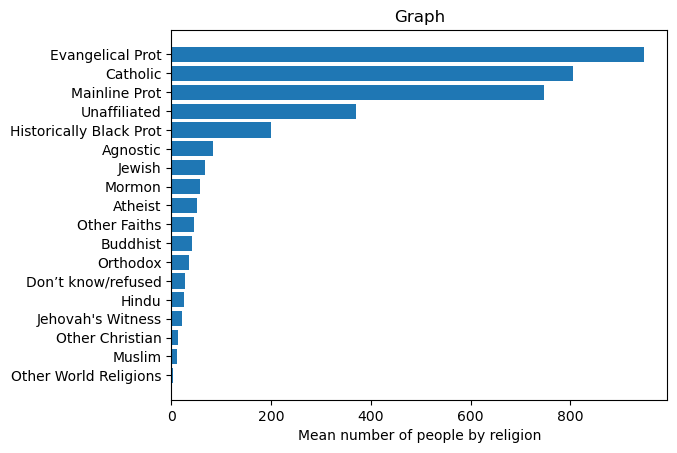

In [66]:
plt.barh(mean_counts_by_religion.index, mean_counts_by_religion)
plt.xlabel('Mean number of people by religion')
plt.title("Graph")
plt.show()

In [73]:
#Create DF
aggregates = {
    'religion' : [],
    'min' : [],
    'mean' : [],
    'max' : []
}

for (religion, group_data) in pew_tidy.groupby("religion"):
#     print(religion, group_data.frequency.min(), group_data.frequency.mean(), group_data.frequency.max(), sep = "; ")
    
    aggregates['religion'].append(religion)
    aggregates['min'].append(group_data.frequency.min())
    aggregates['mean'].append(group_data.frequency.mean())
    aggregates['max'].append(group_data.frequency.max())

pd.DataFrame(aggregates)

,religion,min,mean,max
0,Agnostic,27,82.6,137
1,Atheist,12,51.5,76
2,Buddhist,21,41.1,62
3,Catholic,418,805.4,1489
4,Don’t know/refused,10,27.2,116
5,Evangelical Prot,414,947.2,1529
6,Hindu,1,25.7,54
7,Historically Black Prot,78,199.5,339
8,Jehovah's Witness,6,21.5,37
9,Jewish,19,68.2,162


# Cleaning 

In [77]:
us_weather_data = pd.read_csv("https://raw.githubusercontent.com/synesthesiam/blog/master/posts/data/weather_year.csv")

In [82]:
us_weather_data.dtypes

EDT                            object
Max TemperatureF                int64
Mean TemperatureF               int64
Min TemperatureF                int64
Max Dew PointF                  int64
MeanDew PointF                  int64
Min DewpointF                   int64
Max Humidity                    int64
 Mean Humidity                  int64
 Min Humidity                   int64
 Max Sea Level PressureIn     float64
 Mean Sea Level PressureIn    float64
 Min Sea Level PressureIn     float64
 Max VisibilityMiles            int64
 Mean VisibilityMiles           int64
 Min VisibilityMiles            int64
 Max Wind SpeedMPH              int64
 Mean Wind SpeedMPH             int64
 Max Gust SpeedMPH            float64
PrecipitationIn                object
 CloudCover                     int64
 Events                        object
 WindDirDegrees                 int64
dtype: object

In [85]:
#Fix column names

us_weather_data = us_weather_data.rename(columns = lambda x: x.strip())


In [88]:
us_weather_data.columns = [
    "date", "max_temp", "mean_temp", "min_temp", "max_dew",
    "mean_dew", "min_dew", "max_humidity", "mean_humidity",
    "min_humidity", "max_pressure", "mean_pressure",
    "min_pressure", "max_visibility", "mean_visibility",
    "min_visibility", "max_wind", "mean_wind", "max_gusts",
    "precipitation", "cloud_cover", "events", "wind_dir"
]

In [100]:
#Check why precipitation is an object 
us_weather_data.precipitation.unique()

array(['0.00', 'T', '0.03', '0.04', '0.14', '0.86', '0.06', '0.01',
       '0.51', '0.69', '1.45', '0.38', '0.19', '0.15', '0.49', '0.29',
       '0.09', '0.90', '0.02', '0.07', '0.13', '0.10', '0.36', '0.27',
       '0.16', '0.26', '0.31', '0.05', '0.32', '1.85', '0.53', '2.00',
       '0.92', '1.10', '0.17', '1.13', '0.63', '0.50', '0.71', '0.73',
       '1.52', '0.47', '0.39', '0.18', '0.77', '0.08', '0.33', '0.44',
       '0.48', '0.20', '0.12', '0.82', '1.16', '1.73', '0.40', '0.99',
       '0.30', '1.17'], dtype=object)

In [106]:
#Convert T to small num and convert precipitation to floar
us_weather_data.loc[us_weather_data.precipitation == "T", "precipitation"] = 1e-5
us_weather_data.precipitation = us_weather_data.precipitation.astype(float)

In [108]:
#Fix the datetime
us_weather_data.date = pd.to_datetime(us_weather_data.date)

In [109]:
us_weather_data.dtypes

date               datetime64[ns]
max_temp                    int64
mean_temp                   int64
min_temp                    int64
max_dew                     int64
mean_dew                    int64
min_dew                     int64
max_humidity                int64
mean_humidity               int64
min_humidity                int64
max_pressure              float64
mean_pressure             float64
min_pressure              float64
max_visibility              int64
mean_visibility             int64
min_visibility              int64
max_wind                    int64
mean_wind                   int64
max_gusts                 float64
precipitation             float64
cloud_cover                 int64
events                     object
wind_dir                    int64
dtype: object

In [110]:
#Checking events column
us_weather_data.events.unique()

array([nan, 'Rain', 'Rain-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Rain',
       'Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog', 'Fog-Rain-Snow',
       'Fog-Rain-Snow-Thunderstorm', 'Fog-Snow', 'Snow', 'Rain-Snow'],
      dtype=object)

 # Titanic test

In [111]:
titanic = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")

In [130]:
for el in ["body", "sex", "ticket", "cabin", "age", "home.dest"]:
    print(el, titanic[el].isnull().sum())


body 1189
sex 1
ticket 1
cabin 1015
age 264
home.dest 565


In [122]:
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


# Iris

In [124]:
iris = pd.read_csv("iris.data")

In [129]:
iris["Iris-setosa"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [134]:
iris.columns =['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [139]:
iris[(iris.sepal_length >= 4.5) & (iris.sepal_length <= 10)].mean()

/tmp/ipykernel_23098/2020167279.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris[(iris.sepal_length >= 4.5) & (iris.sepal_length <= 10)].mean()


sepal_length    5.888966
sepal_width     3.051724
petal_length    3.843448
petal_width     1.233793
dtype: float64

In [140]:
iris.sepal_length.mean()

5.8483221476510066

In [149]:
sum = 0
l = iris.sepal_length[(iris.sepal_length >= 4.5) & (iris.sepal_length <= 10)]
for el in iris.sepal_length[(iris.sepal_length >= 4.5) & (iris.sepal_length <= 10)]:
    sum += el
print(sum / len(l))
print(iris.sepal_length[(iris.sepal_length >= 4.5) & (iris.sepal_length <= 10)].mean())

5.888965517241381
5.888965517241379


# Wines

In [158]:
white = pd.read_csv("winequality-white.csv", sep = ";")
test = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")